In [1]:
##
from encoding_tools import *

from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt

/Users/pinheirochagas/anaconda3/envs/mne/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Load data from a given subject
task = 'VTCLoc'
subject_number = '132'
data_dir = '/Volumes/LBCN8T_2/Stanford/data/encoding/raw/' + task + '/'
X = load_stim_features(data_dir, subject_number)
y = load_brain_features(data_dir, subject_number)

In [4]:
# Get trials and times from X features
trials, times = define_trials(X)
# Get feature list from the task 
features_list = select_features(task)

In [13]:
# Define delayed features
# times:
start = 0; stop = 0.85; step = 0.02;
X_delay, delays = delay_features(features_list, X,  start, stop, step)

3
0
faces
(357840, 44)
3
1
numbers
(357840, 44)
3
2
words
(357840, 44)
(357840, 132)
44


In [8]:
# Fit model
cross_val_iterator = cross_validator(trials, 5)
model = Ridge(alpha=1e5)
model, scores_all, coefs_all, intercept_all = fit_encoding_model(model, cross_val_iterator, y, X, X_delay)

In [12]:
# Get the r2 for single trials across all electrodes
r2_single_trials = single_trials_prediciton(model, y, X, X_delay, trials)

/Users/pinheirochagas/anaconda3/envs/mne/lib/python3.6/site-packages/sklearn/preprocessing/data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


faces


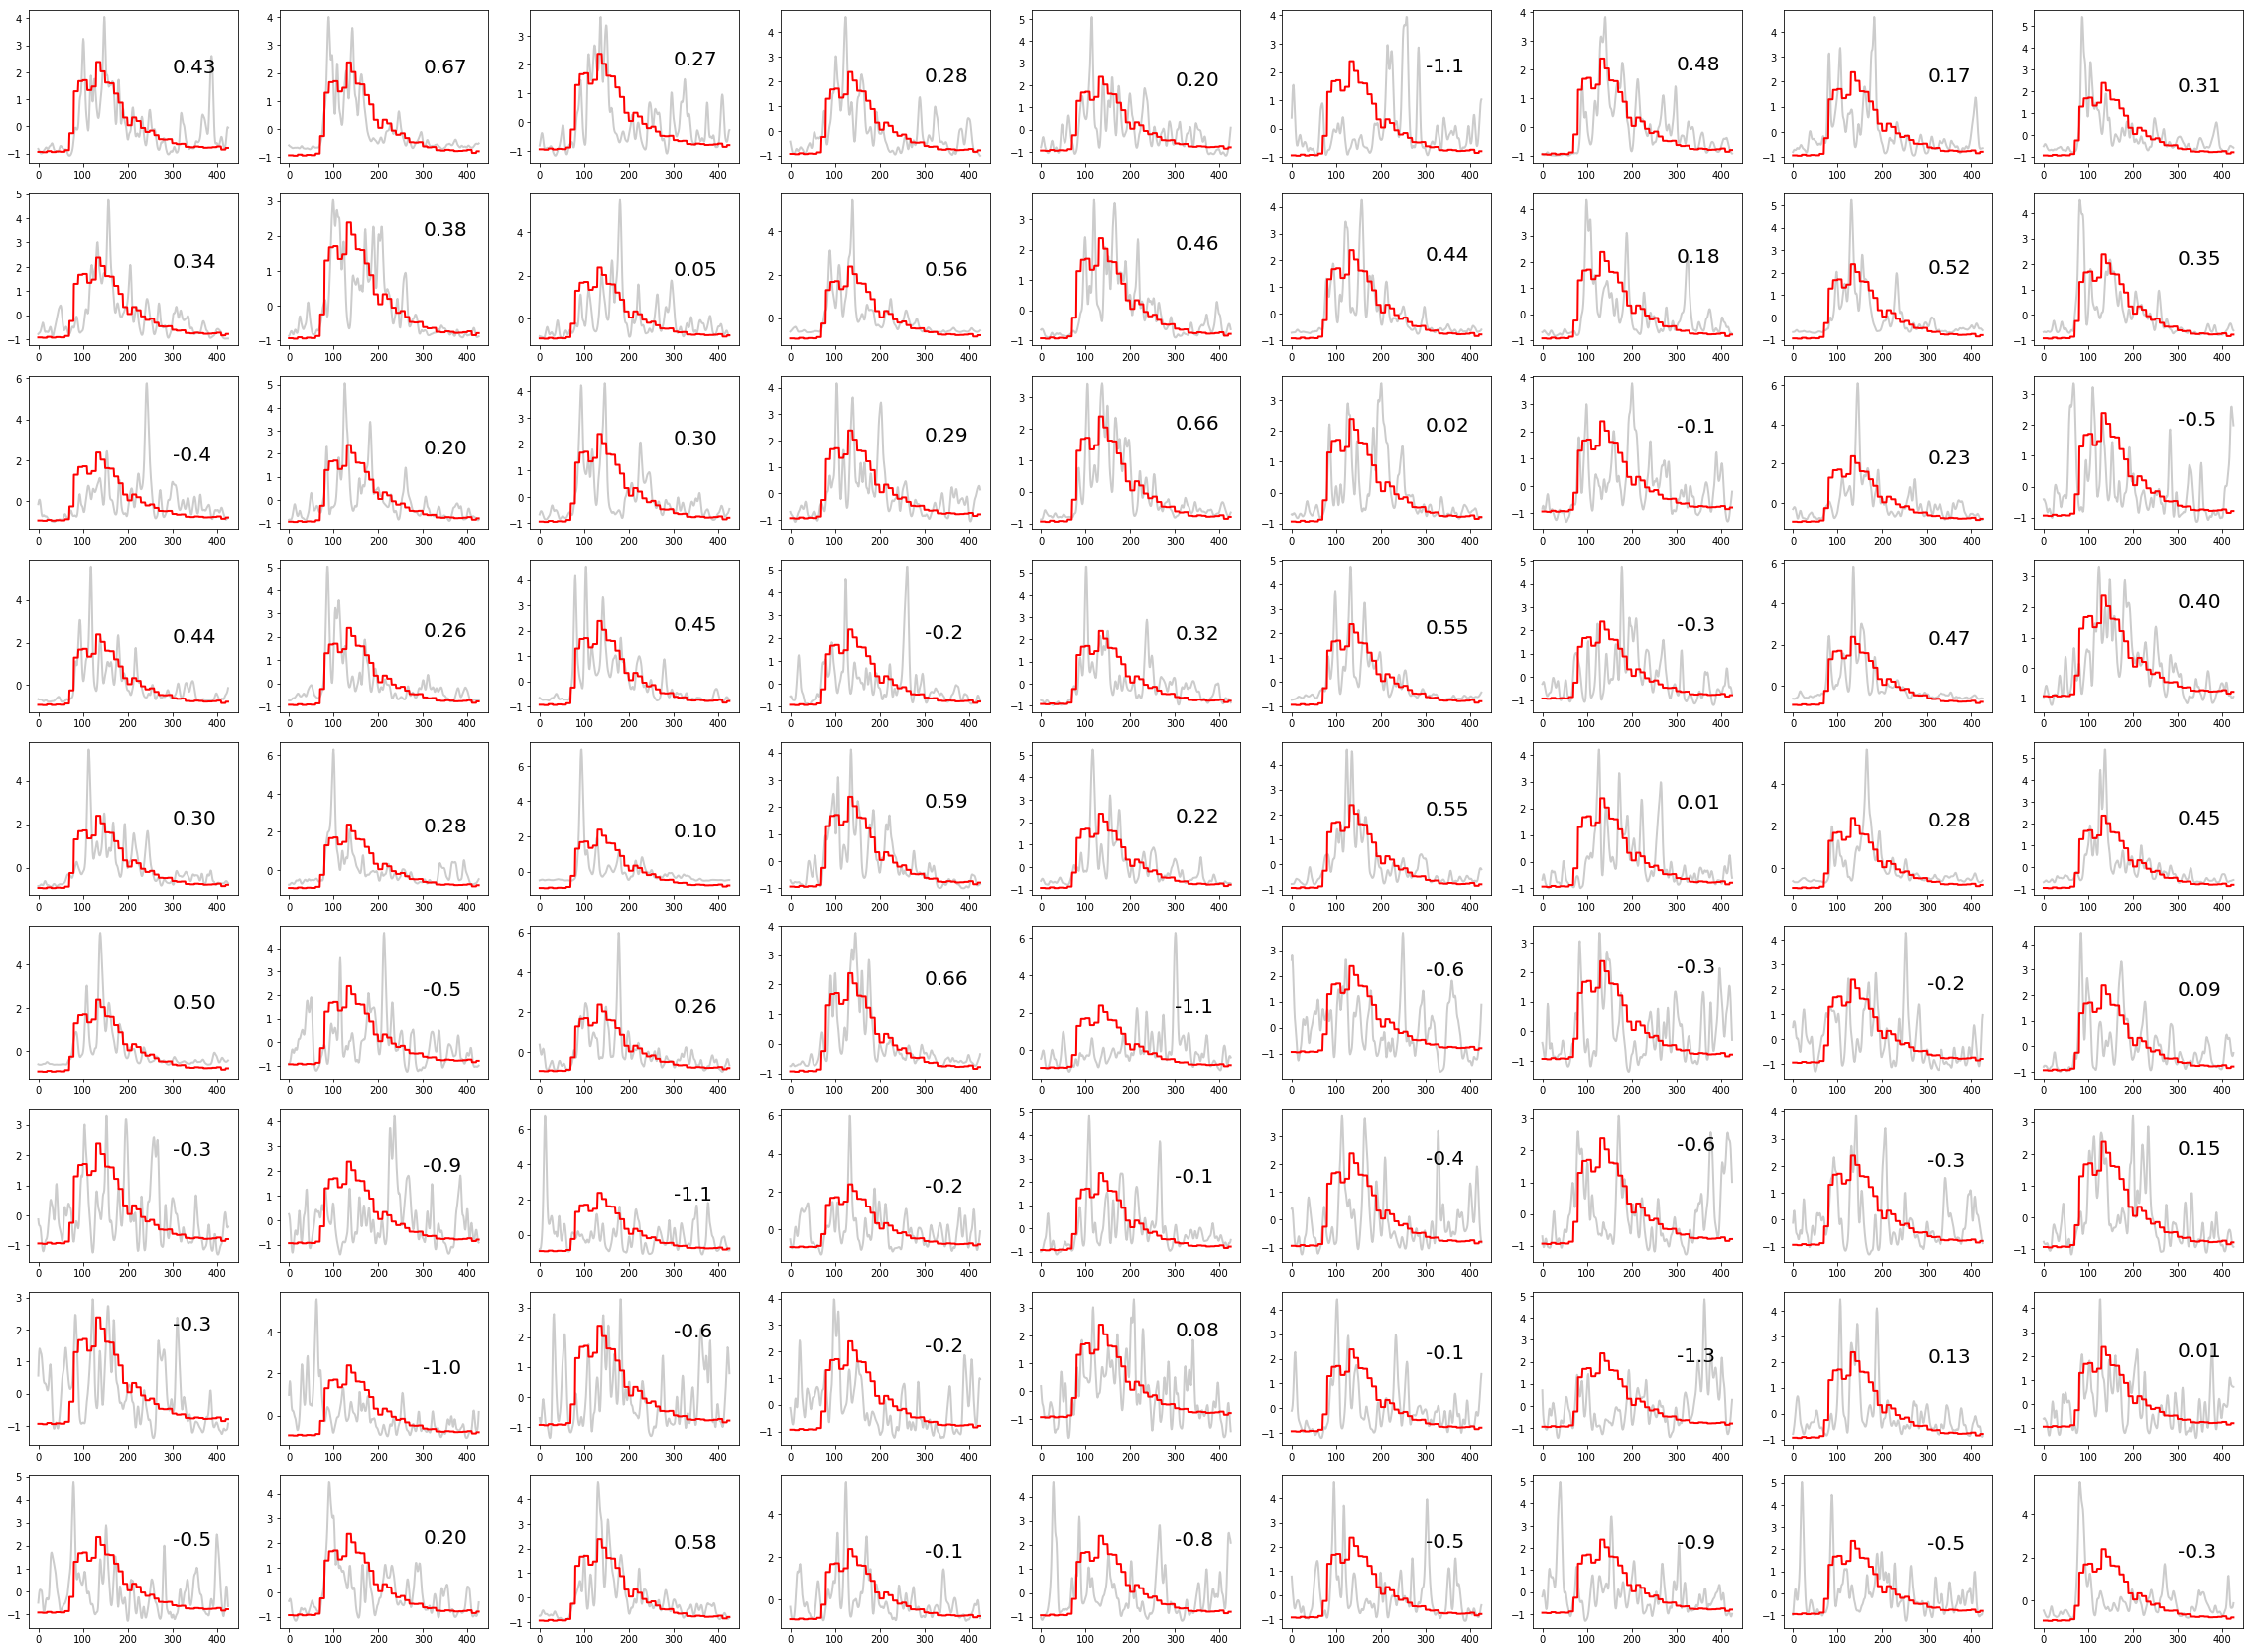

In [75]:
# Plot single trials predictions
features_list_plot = features_list[0:1]
for iif in range(0, len(features_list_plot)):
    trials_plot = np.unique(X['trials'][X[features_list_plot[iif]]==1])
    y_pred = X_delay[X['trials']==trials_plot[0]]
    predictions = model.predict(y_pred)
    print(features_list[iif])
    subplot_dim = int(np.round(np.sqrt(len(trials_plot))))
    fig, axs = plt.subplots(nrows=subplot_dim,  ncols=subplot_dim, figsize=(40,30))
    for ax, it in zip(axs.flatten(), range(0,len(trials_plot))):
        y_true = scale(y[X['trials']==trials_plot[it], 77])
        y_pred = scale(predictions[:,77])
        ax.plot(y_true, color='k', alpha=.2, lw=2)
        ax.plot(y_pred, color='r', lw=2)
        r2_tmp = str(r2_score(y_true, y_pred))
        ax.text(300,2, r2_tmp[0:4], fontsize=20)

[Text(0,0,'faces'), Text(0,0,'numbers'), Text(0,0,'words')]

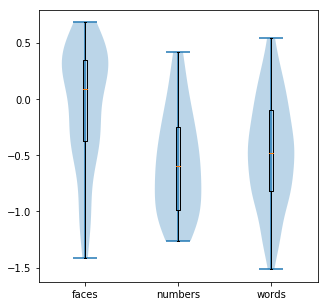

In [62]:
# Plot single chanel single trial predicitons
# Plot all chanells single trial predicitons
fig, ax = plt.subplots(nrows=1,  ncols=1, figsize=(5,5))
elect = 77
score_trials = []
for it in range(0,len(features_list)):
    trials_tmp = np.unique(X['trials'][X[features_list[it]]==1])
    scores_tmp = np.array(r2_scores_all[elect,trials_tmp])
    #scores_tmp = scores_tmp[scores_tmp>=0]
    #score_trials.append(scores_tmp.tolist())
    score_trials.append(scores_tmp)

ax.violinplot(score_trials)
ax.boxplot(score_trials, widths=(0.05))
ax.set_xticklabels(features_list)

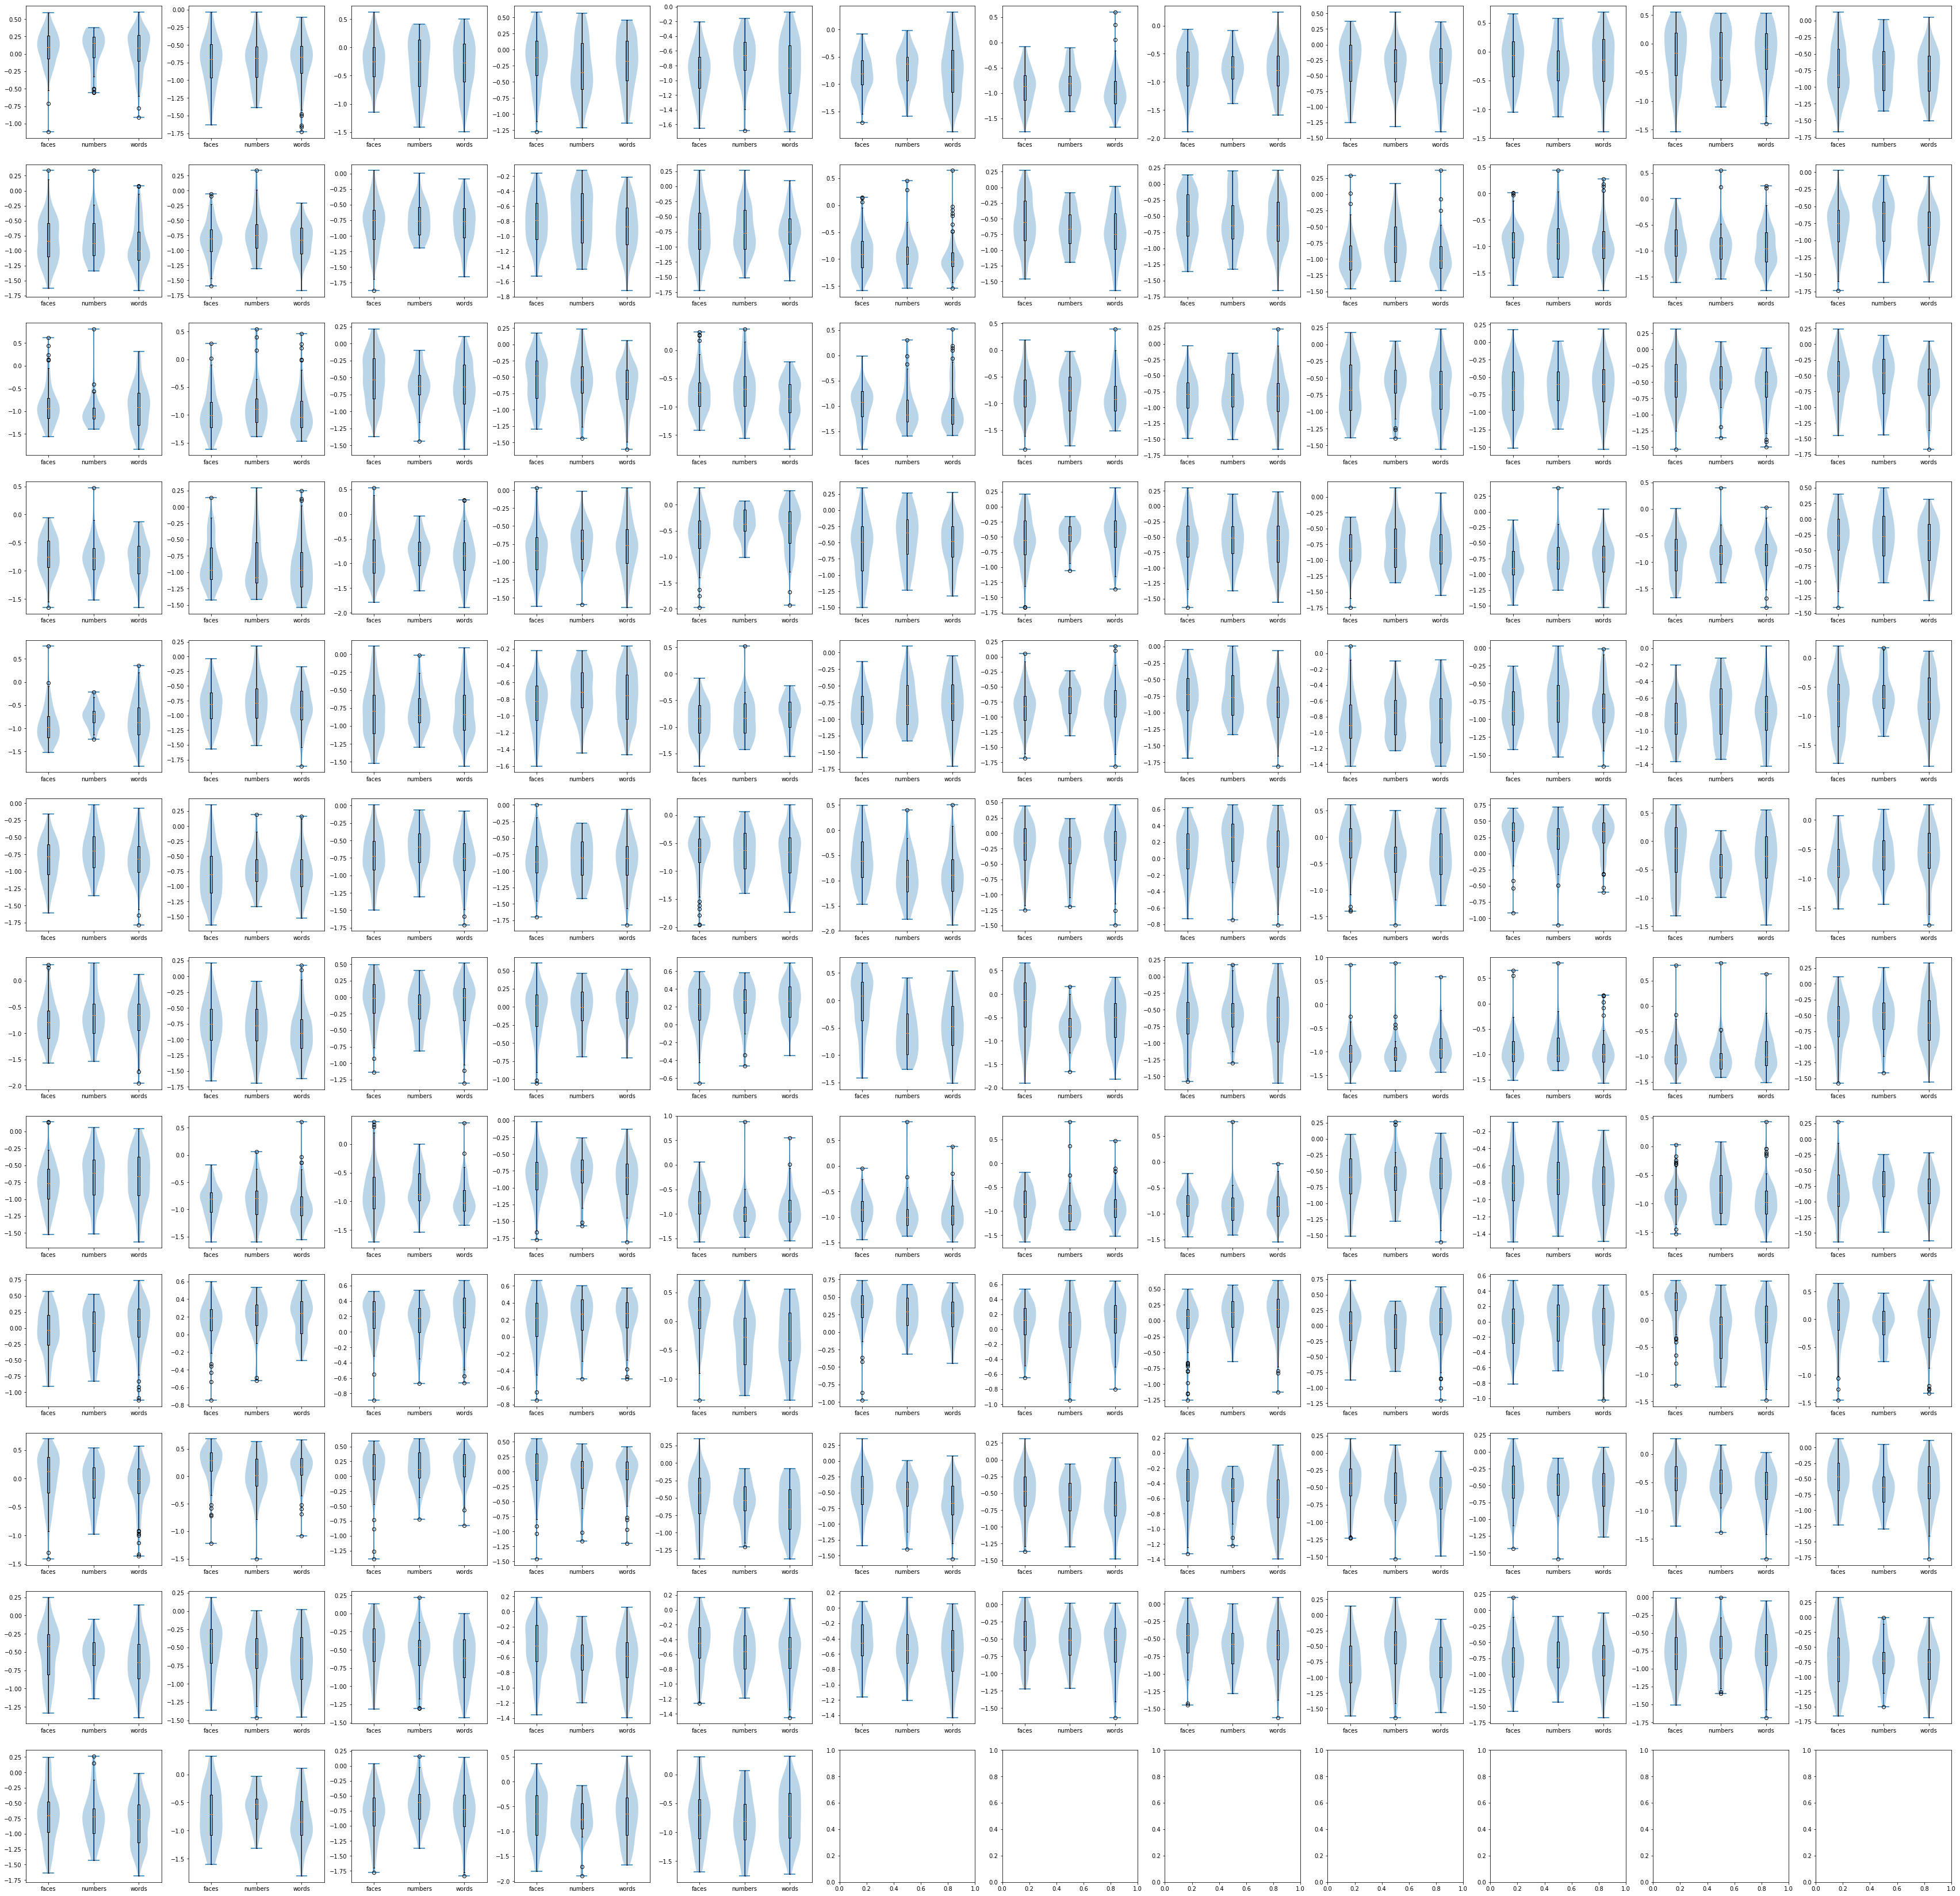

In [60]:
# Plot all chanells single trial predicitons
subplot_dim = int(np.round(np.sqrt(y.shape[1])))
fig, axs = plt.subplots(nrows=subplot_dim,  ncols=subplot_dim, figsize=(60,60))
for ie, ax in zip(range(0, y.shape[1]), axs.flatten()):
    score_trials = []
    for it in range(0,len(features_list)):
        trials_tmp = np.unique(X['trials'][X[features_list[it]]==1])
        scores_tmp = np.array(r2_scores_all[ie,trials_tmp])
        #scores_tmp = scores_tmp[scores_tmp>=0]
        #score_trials.append(scores_tmp.tolist())
        score_trials.append(scores_tmp)

    ax.violinplot(score_trials)
    ax.boxplot(score_trials, widths=(0.05))
    ax.set_xticklabels(features_list)